In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sympy as sp
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('DataBase.csv')
df

,duration,distance,place,type
0,14:39:12,1036.23,SÃO PAULO,VUC
1,13:40:21,887.25,SÃO PAULO,TOCO
2,13:11:51,854.96,SÃO PAULO,TOCO
3,14:06:40,842.50,SÃO PAULO,TOCO
4,13:53:13,839.72,SÃO PAULO,TOCO
...,...,...,...,...
1824,00:00:05,0.00,DUQUE DE CAXIAS,VUC
1825,00:00:05,0.00,DUQUE DE CAXIAS,VUC
1826,00:00:08,0.00,DUQUE DE CAXIAS,VUC
1827,00:00:05,0.00,DUQUE DE CAXIAS,VUC


# TRATAMENTO DOS DADOS
- Passando as colunas numéricas para os deus devidos tipos, as vezes o pandas interpreta o número como um objeto ou string

In [3]:
df['distance'] = pd.to_numeric(df.distance, errors='coerce')
df.head()

,duration,distance,place,type
0,14:39:12,1036.23,SÃO PAULO,VUC
1,13:40:21,887.25,SÃO PAULO,TOCO
2,13:11:51,854.96,SÃO PAULO,TOCO
3,14:06:40,842.50,SÃO PAULO,TOCO
4,13:53:13,839.72,SÃO PAULO,TOCO


- Passando a coluna de duração para objeto timedelta do pandas, para realmente podermos trabalhar com os dados no formato de horas

In [4]:
df['duration'] = pd.to_timedelta(df['duration'], errors='coerce')
df.head()

,duration,distance,place,type
0,0 days 14:39:12,1036.23,SÃO PAULO,VUC
1,0 days 13:40:21,887.25,SÃO PAULO,TOCO
2,0 days 13:11:51,854.96,SÃO PAULO,TOCO
3,0 days 14:06:40,842.50,SÃO PAULO,TOCO
4,0 days 13:53:13,839.72,SÃO PAULO,TOCO


- Passando essa mesma coluna de duração para segundos, pois será melhor analisar assim, tendo a duração total em somenta 1 unidade

In [5]:
df['duration'] = df.duration.dt.total_seconds()
df.head()

,duration,distance,place,type
0,52752.0,1036.23,SÃO PAULO,VUC
1,49221.0,887.25,SÃO PAULO,TOCO
2,47511.0,854.96,SÃO PAULO,TOCO
3,50800.0,842.50,SÃO PAULO,TOCO
4,49993.0,839.72,SÃO PAULO,TOCO


# ANÁLISE DE DADOS

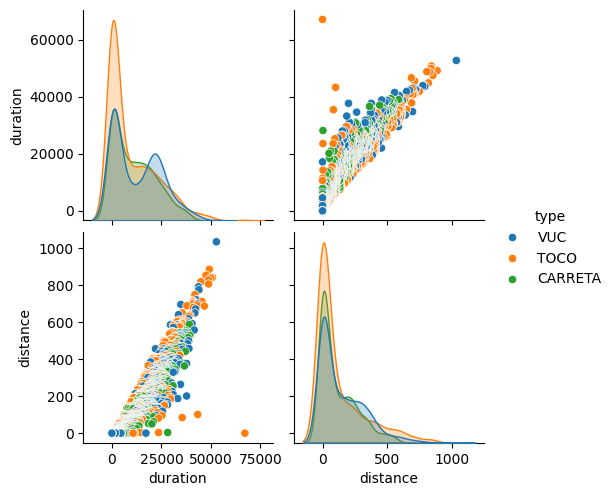

In [6]:
sns.pairplot(df, hue='type')

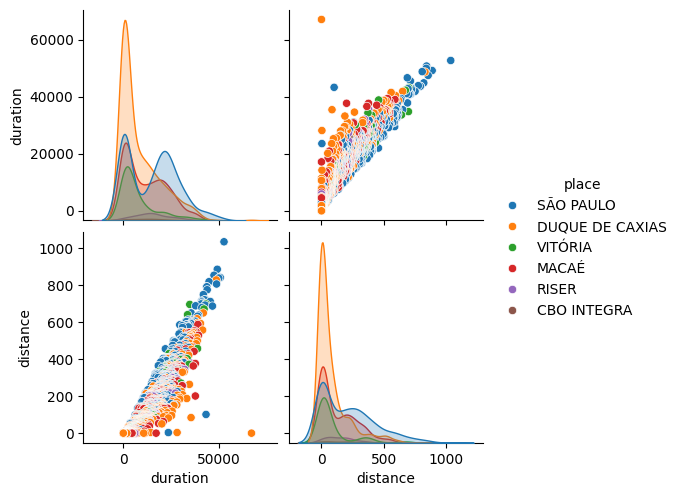

In [7]:
sns.pairplot(df, hue='place')

# TRANSFORMAÇÃO DOS DADOS

In [8]:
df = pd.get_dummies(df, columns=['place', 'type'])
df.head()

,duration,distance,place_CBO INTEGRA,place_DUQUE DE CAXIAS,place_MACAÉ,place_RISER,place_SÃO PAULO,place_VITÓRIA,type_CARRETA,type_TOCO,type_VUC
0,52752.0,1036.23,False,False,False,False,True,False,False,False,True
1,49221.0,887.25,False,False,False,False,True,False,False,True,False
2,47511.0,854.96,False,False,False,False,True,False,False,True,False
3,50800.0,842.50,False,False,False,False,True,False,False,True,False
4,49993.0,839.72,False,False,False,False,True,False,False,True,False


- Removendo linhas com valores nulos

In [9]:
rows_afected = (df.isna().any(axis=1)).sum()
print(f'{rows_afected} linhas removidas')

df.dropna(inplace=True)

5 linhas removidas


# PREVISÃO DOS DADOS

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve


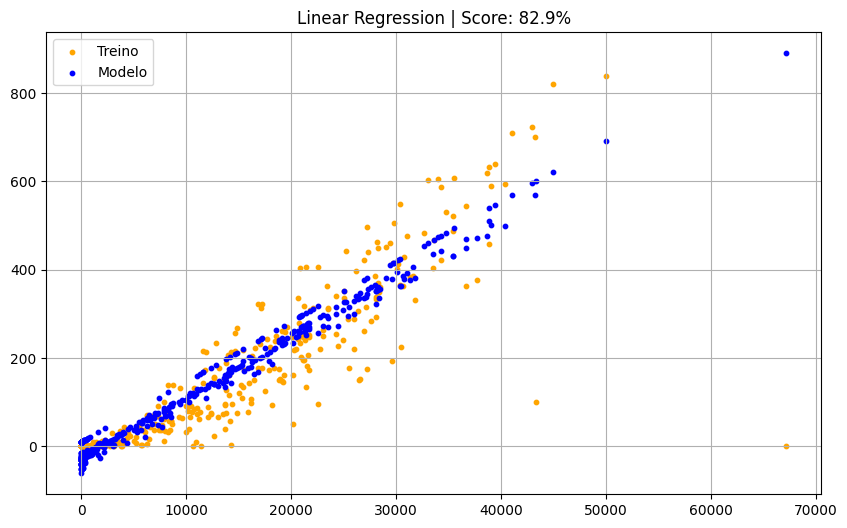

In [12]:
xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.25)
yModel = model.predict(xTeste)
    
plt.figure(figsize=(10, 6))

plt.scatter(xTeste.duration, yTeste, color='orange', s=10, label='Treino')
plt.scatter(xTeste.duration, yModel, color='blue', s=10, label='Modelo',)

plt.title('Linear Regression | Score: ' + str(round(score*100, 2)) + '%')
plt.legend()
plt.grid()

In [13]:
def sympyLinearRegression(xData, yData):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.25)

    regressaoLinear = LinearRegression()
    regressaoLinear.fit(xTreino, yTreino)
    
    a = regressaoLinear.coef_
    b = regressaoLinear.intercept_

    total = 0
    for i in range(len(a)):
        total += sp.var(f'x_{i}')*a[i]

    return total + b

sympyLinearRegression(xData, yData)

0.0134442402061698*x_0 - 0.901607464861391*x_1 - 12.4066468189238*x_2 - 3.34841837724557*x_3 - 34.4696145335907*x_4 + 28.4994615360123*x_5 + 22.6268256586092*x_6 + 0.79475715327628*x_7 + 11.7839080530276*x_8 - 12.5786652063039*x_9 - 26.5551124488544

In [14]:
list(df.columns)

['duration',
 'distance',
 'place_CBO INTEGRA',
 'place_DUQUE DE CAXIAS',
 'place_MACAÉ',
 'place_RISER',
 'place_SÃO PAULO',
 'place_VITÓRIA',
 'type_CARRETA',
 'type_TOCO',
 'type_VUC']

# SALVANDO O MODELO

In [15]:
import joblib

joblib.dump(model, 'model.pkl')   # SALVANDO
model = joblib.load('model.pkl')  # CARREGANDO ELE NOVAMENTE

- Verificando se o modelo pode ser usado normalmente

In [16]:
yModel = model.predict(xTeste)
score  = metrics.r2_score(yTeste, yModel)
score

0.8179690122064904